In [1]:
# https://ai.google/tools/datasets/google-facial-expression/
import imageio
import os
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm_notebook as tqdm
import time
import numpy as np
import random
import hashlib

In [3]:
train_df = pd.read_csv('FEC_dataset/two_class.csv')
m = len(train_df)
print(f'Got a CSV of {m} rows')
train_df.head()

Got a CSV of 136379 rows


,Image1,Image2,Image3,anno
0,22d27258ff7e78577c811c5b8187446f.jpg,5806875441d55aa9c1d8a8998d160a82.jpg,bb3f152775a40c53daafab83a43f5254.jpg,2
1,e5a2d4733125b8aedb18c2d8040868e6.jpg,8ed9229eb118373590a069b774aeeeec.jpg,9d5910b05710e09d2ab12e4d4b224938.jpg,3
2,e5a2d4733125b8aedb18c2d8040868e6.jpg,53e165101543063e4b4946eb411ebecd.jpg,bad09c8ea230ee5919fcf794ea7f4f4b.jpg,3
3,e5a2d4733125b8aedb18c2d8040868e6.jpg,0d3252b4ad950e4e875fd2ace92c9641.jpg,9f99820796b92f6566a4639028ad0a00.jpg,3
4,e5a2d4733125b8aedb18c2d8040868e6.jpg,59d6ef6f3971c8a828fb67b9961dba23.jpg,08d4159f45a1607a0aa00bd6dc75c24f.jpg,1


In [3]:
annotators = list(train_df['Anno1_id']) + list(train_df['Anno2_id']) + list(train_df['Anno3_id'])
annotators = list(set(annotators))

In [7]:
stats = {}
presence = {}

def majority(row):
    counter = np.asarray([0,0,0,0])
    for i in range(1,7):
        counter[row[f'Anno{i}']]+=1
    if(max(counter)!=2):
        return counter.argmax()
    else:
        return None
    
for key in annotators:
    stats[key] = 0
    presence[key] = 0
    
problem_ind = [index for index, row in tqdm(train_df.iterrows()) if not majority(row)]
print(len(problem_ind))
# for index, row in train_df.iterrows():
#     if
#     anno = majority(row)
#     if(not anno):
        
#     for i in range(1,7):
#         anno = row[f'Anno{i}_id']
#         presence[anno]+=1
        


1737


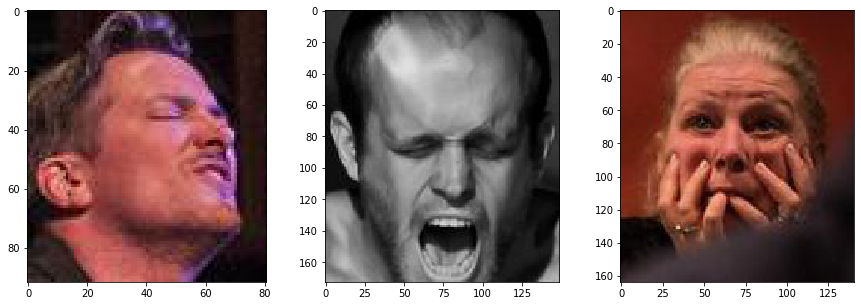

In [36]:
import random
fig, axs = plt.subplots(1,3, figsize=(15,5))
# row = random.choice(problem_ind)
row = random.randint(0,m)
for col in range(3):
    image = train_df[f'Image{col+1}'][row]
    axs[col].imshow(imageio.imread(f'FEC_dataset/formatted/{image}'))

# print("Report:")
# # print('type:', train_df['Triplet_type'][row])
# for i in range(1,7):
#     left, right = train_df[f'Anno{i}_id'][row], train_df[f'Anno{i}'][row] 
#     print(f' {left}: {right}')

In [25]:
train_df = train_df.drop(problem_ind)#.to_csv('FEC_dataset/two_class_formatted.csv')
maj = [majority(row) for index, row in tqdm(train_df.iterrows())]

NameError: name 'problem_ind' is not defined

In [15]:
# pd.read_csv('FEC_dataset/two_class_formatted.csv').he
train_df['anno'] = maj
train_df.to_csv('FEC_dataset/two_class_formatted.csv')

In [18]:
len(pd.read_csv('FEC_dataset/two_class_formatted.csv'))

136379

In [38]:
train_df = pd.read_csv('FEC_dataset/two_class_formatted.csv')
m = len(train_df)
print(f"Got a csv of {m} rows")
L = [None, None, None, None]
L[1] = list(train_df["Image1"])
L[2] = list(train_df["Image2"])
L[3] = list(train_df["Image3"])

for i, anno in tqdm(enumerate(train_df['anno'])):
    # annotation is negative example
    # exchange with 3rd column
    L[3], L[anno] = L[anno], L[3]

train_df["Image1"] = L[1]
train_df["Image2"] = L[2]
train_df["Image3"] = L[3]

Got a csv of 136379 rows


In [39]:
train_df.to_csv('FEC_dataset/two_class_ready.csv')